<a href="https://colab.research.google.com/github/HimanshuSahoo/Himanshu_Python/blob/main/Clustering_EastWestAirlines_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')

In [4]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
df1=df.drop('ID#',axis=1)
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
df1=df1.drop('Award?',axis=1)

In [9]:
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [10]:
#dopped id and award because they do not give any details

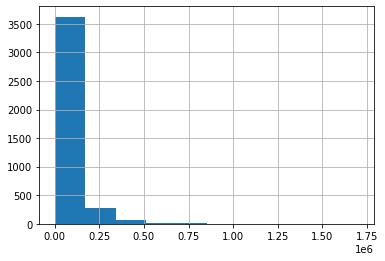

In [11]:
%matplotlib inline
df1['Balance'].hist()

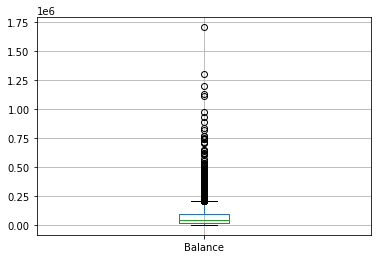

In [12]:
df1.boxplot(column=['Balance'])

In [13]:
df1.Balance.describe()

count    3.999000e+03
mean     7.360133e+04
std      1.007757e+05
min      0.000000e+00
25%      1.852750e+04
50%      4.309700e+04
75%      9.240400e+04
max      1.704838e+06
Name: Balance, dtype: float64

In [14]:
uf=9.240400e+04+(1.5*(9.240400e+04-1.852750e+04))
uf

203218.75

In [15]:
df1[df1.Balance>uf]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
8,443003,0,3,2,1,1753,43,3850,12,6948
24,205651,500,1,1,1,4025,21,700,4,7932
32,276571,0,4,1,1,42044,23,0,0,7872
43,619393,0,3,1,1,15008,14,0,0,7819
45,288865,967,1,1,1,23600,14,2000,4,6884
...,...,...,...,...,...,...,...,...,...,...
3754,221543,0,1,1,1,10300,5,200,3,3554
3756,203353,0,1,1,1,14000,13,4000,8,3557
3772,822321,0,5,1,1,138334,26,600,2,3288
3788,374613,0,1,2,1,23592,31,5000,14,3463


In [16]:
df2=df1[df1.Balance<uf]
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


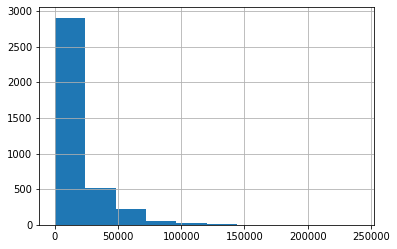

In [17]:
df2['Bonus_miles'].hist()

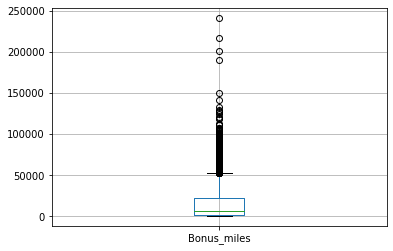

In [18]:
df2.boxplot(column=['Bonus_miles'])

In [19]:
df2.Bonus_miles.describe()

count      3733.000000
mean      15328.525047
std       21336.284431
min           0.000000
25%        1100.000000
50%        6250.000000
75%       21559.000000
max      240544.000000
Name: Bonus_miles, dtype: float64

In [20]:
uf1=21559+(1.5*(21559-1100))
uf1

52247.5

In [21]:
df2[df2.Bonus_miles>52247.5]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
11,96522,0,5,1,1,61105,19,0,0,6924
20,120576,0,5,1,1,58831,23,250,2,6896
79,38896,0,5,1,1,76988,16,556,1,7771
85,35418,0,5,1,1,58557,18,900,3,6813
94,185549,0,5,1,1,110859,39,2950,16,6778
...,...,...,...,...,...,...,...,...,...,...
3822,166638,0,5,1,1,64572,22,0,0,1697
3846,97510,1678,5,1,1,71609,51,7650,26,1665
3855,190730,0,5,1,1,78916,28,2450,9,1648
3883,126167,0,5,1,1,190160,15,0,0,1612


In [22]:
df3=df2[df2.Bonus_miles<52247.5]
df3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


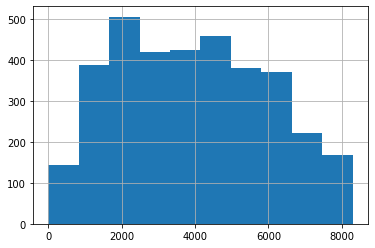

In [23]:
df3['Days_since_enroll'].hist()

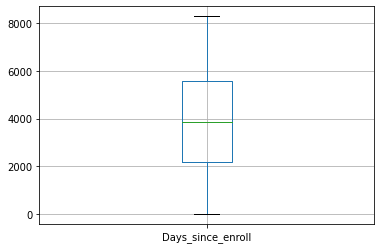

In [24]:
df3.boxplot(column=['Days_since_enroll'])

# Normalization

In [25]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [26]:
df3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [27]:
df_norm = norm_func(df3.iloc[:,0:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.138885,0.0,0.00,0.0,0.0,0.003335,0.018182,0.000000,0.000000,0.843742
1,0.094968,0.0,0.00,0.0,0.0,0.004121,0.036364,0.000000,0.000000,0.839884
2,0.204080,0.0,0.00,0.0,0.0,0.079021,0.072727,0.000000,0.000000,0.847842
3,0.072919,0.0,0.00,0.0,0.0,0.009583,0.018182,0.000000,0.000000,0.837955
4,0.482402,0.0,0.75,0.0,0.0,0.829883,0.472727,0.124558,0.111111,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.091178,0.0,0.00,0.0,0.0,0.163389,0.072727,0.011994,0.027778,0.168917
3995,0.317737,0.0,0.00,0.0,0.0,0.018802,0.090909,0.000000,0.000000,0.167953
3996,0.363198,0.0,0.50,0.0,0.0,0.487715,0.145455,0.000000,0.000000,0.168797
3997,0.270924,0.0,0.00,0.0,0.0,0.009583,0.018182,0.029985,0.027778,0.168676


# Hierarchical Clustering

In [28]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

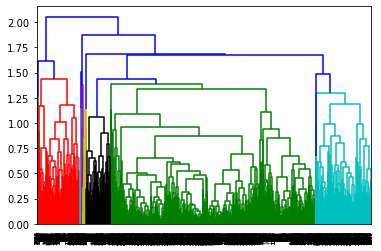

In [29]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [30]:
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'complete')

In [31]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [32]:
df3['h_clusterid'] = hc.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [34]:
df3.h_clusterid.describe()

count    3473.000000
mean        0.131011
std         0.337461
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: h_clusterid, dtype: float64

In [35]:
df3.h_clusterid.value_counts()

0    3018
1     455
Name: h_clusterid, dtype: int64

In [36]:
df3.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,43857.225646,127.277336,1.496024,1.01723,1.001988,7472.381710,8.822068,331.865474,0.998675,3711.645129
1,1,91796.727473,123.492308,3.670330,1.00000,1.002198,34170.246154,18.956044,485.191209,1.459341,5556.342857


# K-Means

In [37]:
from sklearn.cluster import KMeans

In [38]:
df4=df3.drop('h_clusterid',axis=1)

In [39]:
df4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df4.iloc[:,1:])

In [41]:
scaled_df

array([[-0.17048239, -0.69868269, -0.0991356 , ..., -0.32953583,
        -0.35375725,  1.49101343],
       [-0.17048239, -0.69868269, -0.0991356 , ..., -0.32953583,
        -0.35375725,  1.47535297],
       [-0.17048239, -0.69868269, -0.0991356 , ..., -0.32953583,
        -0.35375725,  1.50765268],
       ...,
       [-0.17048239,  1.09079   , -0.0991356 , ..., -0.32953583,
        -0.35375725, -1.24858958],
       [-0.17048239, -0.69868269, -0.0991356 , ...,  0.13861764,
        -0.0197173 , -1.24907897],
       [-0.17048239, -0.69868269, -0.0991356 , ..., -0.32953583,
        -0.35375725, -1.25054714]])

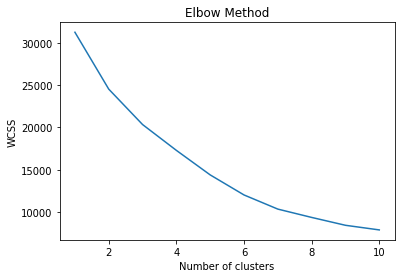

In [42]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
clusters_new = KMeans(7, random_state=50)
clusters_new.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [44]:
clusters_new.labels_

array([1, 1, 1, ..., 0, 2, 2], dtype=int32)

In [45]:
df4['clusterid_new'] = clusters_new.labels_

In [46]:
df4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,1
2,41354,0,1,1,1,4123,4,0,0,7034,1
3,14776,0,1,1,1,500,1,0,0,6952,1
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2
3995,64385,0,1,1,1,981,5,0,0,1395,2
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,2


In [47]:
df4.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,73177.730769,41.790927,3.344181,1.000000,1.000986,26757.712032,17.306706,218.347140,0.624260,4389.778107
1,1,44214.891368,59.612027,1.132881,1.000000,1.000970,3942.370514,6.838991,200.943744,0.641125,5686.238603
2,2,31919.180693,39.476898,1.080033,1.000000,1.000000,3176.339934,5.655116,131.368812,0.449670,2129.536304
3,3,78383.553030,269.393939,1.530303,1.000000,1.000000,15386.424242,20.393939,4435.333333,12.689394,3941.659091
4,4,79050.500000,591.000000,1.000000,1.000000,3.500000,48388.000000,20.000000,1150.000000,4.500000,5046.000000
5,5,42179.184211,26.315789,1.000000,2.368421,1.000000,12020.000000,16.131579,380.263158,1.473684,3870.552632
6,6,80619.545455,5702.000000,1.704545,1.000000,1.000000,10634.954545,10.250000,734.590909,2.250000,3583.272727


# DBSCAN

In [48]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [49]:
df5=df3.drop('h_clusterid',axis=1)
df5

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [50]:
array=df5.values
array

array([[28143,     0,     1, ...,     0,     0,  7000],
       [19244,     0,     1, ...,     0,     0,  6968],
       [41354,     0,     1, ...,     0,     0,  7034],
       ...,
       [73597,     0,     3, ...,     0,     0,  1402],
       [54899,     0,     1, ...,   500,     1,  1401],
       [ 3016,     0,     1, ...,     0,     0,  1398]])

In [51]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[-0.49470322, -0.17048239, -0.69868269, ..., -0.32953583,
        -0.35375725,  1.49101343],
       [-0.69485788, -0.17048239, -0.69868269, ..., -0.32953583,
        -0.35375725,  1.47535297],
       [-0.19756385, -0.17048239, -0.69868269, ..., -0.32953583,
        -0.35375725,  1.50765268],
       ...,
       [ 0.52763973, -0.17048239,  1.09079   , ..., -0.32953583,
        -0.35375725, -1.24858958],
       [ 0.10708778, -0.17048239, -0.69868269, ...,  0.13861764,
        -0.0197173 , -1.24907897],
       [-1.05985505, -0.17048239, -0.69868269, ..., -0.32953583,
        -0.35375725, -1.25054714]])

In [52]:
dbscan = DBSCAN(eps=0.2, min_samples=20)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=None, p=None)

In [53]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1,  1])

In [54]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,-1
1,-1
2,-1
3,0
4,-1
...,...
3468,-1
3469,-1
3470,-1
3471,-1


In [55]:
pd.concat([df5,cl],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,-1.0
1,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,-1.0
2,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,-1.0
3,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0
4,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1.0,1.0,1.0,8525.0,4.0,200.0,1.0,1403.0,NaN
3995,64385.0,0.0,1.0,1.0,1.0,981.0,5.0,0.0,0.0,1395.0,NaN
3996,73597.0,0.0,3.0,1.0,1.0,25447.0,8.0,0.0,0.0,1402.0,NaN
3997,54899.0,0.0,1.0,1.0,1.0,500.0,1.0,500.0,1.0,1401.0,NaN
